# **\[PINKOCTO\]** 퓨리에변환(detailed)

신록예찬  
2023-06-23

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 예비학습

`-` Notations: 일반적으로 신호처리에서 사용하는 notation은 통계학에서
사용하는 notation과 다른데 대충 정리하면 아래와 같다.

-   자료의수: $N$ // 통계에서는 보통 $n$으로 씀.
-   시간을 나타내는 인덱스: $n$, $n$은 0부터 시작 // 통계에서는 $t$라고
    쓰며 $t=1$ 부터 시작함.
-   주파수영역의의 인덱스: $k$, $k$는 0부터 시작
-   이산신호: ${\bf x}:=[x[0],x[1],\dots,x[n],\dots,x[N-1]]^\top$ //
    통계에서는 ${\bf x}:=[x_1,x_2,\dots,x_n]$ 으로 사용
-   퓨리에변환된 이산신호:
    ${\bf X}:=[X[0],X[1],\dots,X[k],\dots,X[N-1]]^\top$

`-` 공식: 이 버전만 기억해도 무방함.

-   https://en.wikipedia.org/wiki/Discrete_Fourier_transform

$$X[k] = \sum_{n=0}^{N-1}x[n]e^{-\frac{j2\pi kn}{N}}, k=0,1,2\dots,N-1$$

# Parseval thm

-   https://en.wikipedia.org/wiki/Parseval%27s_theorem

`-` 이론: 신호 ${\bf y}$가 주어졌다고 할때 아래의 식이 성립함.

$$\sum_{n=0}^{N-1}|x[n]|^2= \frac{1}{N}\sum_{k=0}^{N-1}|X[k]|^2$$

이 이론에 해당하는 state는 아래에 서술되어 있음

![그림1: 위키에서 긁은
수식](attachment:2023-06-28-퓨리에변환(detailed)_files/figure-ipynb/13f48c54-a49a-4775-8923-feeecde79602-1-7ebe5889-44d5-4a67-b81d-54a7ba35ff7e.png)

`-` 예제1
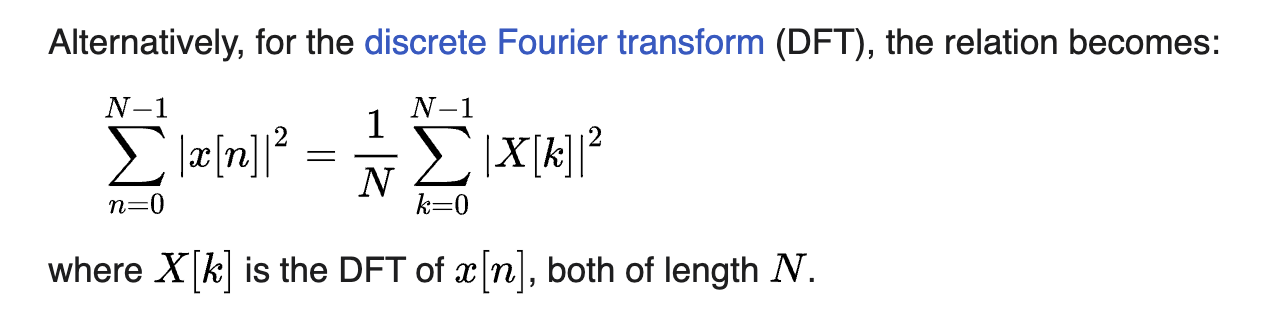

In [150]:
x = np.array([1,2,3,4,5])
X = np.fft.fft(x) 

In [151]:
sum(abs(x)**2)

In [153]:
sum(abs(X)**2)/len(x)

`-` 예제2

In [155]:
t = np.linspace(0,1,100)
x = np.cos(2*t)
X = np.fft.fft(x) 

In [156]:
sum(abs(x)**2)

In [157]:
sum(abs(X)**2)/len(x)

`-` 예제3

In [158]:
x = np.random.randn(100)
X = np.fft.fft(x) 

In [159]:
sum(abs(x)**2)

In [160]:
sum(abs(X)**2)/len(x)

`-` 결론: 무슨 신호를 가져와도 파르스발 정리는 성립함.

# $X[0]$의 해석

`-` 이론: $\frac{1}{N}X[0]$의 값은 $\frac{1}{N}\sum_{n=0}^{N-1}x[n]$을
의미함.

-   이유: $X[k] = \sum_{n=0}^{N-1}x[n]e^{-\frac{j2\pi kn}{N}}$에서
    $k=0$을 대입하면 바로 나옴

`-` 예제1

In [171]:
x = np.array([1,2,3,4,5])
X = np.fft.fft(x) 

In [172]:
np.mean(x)

In [174]:
X[0]/5

`-` 예제2

In [175]:
t = np.linspace(0,1,100)
x = np.cos(2*t)
X = np.fft.fft(x) 

In [176]:
np.mean(x)

In [177]:
X[0]/100

`-` 예제3

In [178]:
x = np.random.randn(100)
X = np.fft.fft(x) 

In [179]:
np.mean(x)

In [180]:
X[0]/100

# 대칭과 관련한 이론

## 이론 및 예시

`-` 이론: real-valued signal은 무조건 $|X[k]|^2$의 그래프가 대칭으로
나옴 (단, $X[0]$은 제외)

`-` 예시1:

In [181]:
x = np.array([1,2,3,4,5])
X = np.fft.fft(x) 

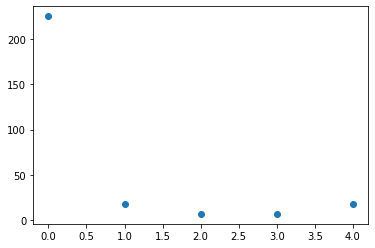

In [182]:
plt.plot(abs(X)**2,'o')

-   첫항을 제외하고 대칭임

`-` 예시2:

In [183]:
x = np.array([1,2,3,-3,-2,-1])
X = np.fft.fft(x) 

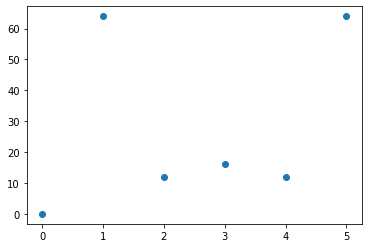

In [184]:
plt.plot(abs(X)**2,'o')

-   첫항을 제외하고 대칭임

`-` 예시3: ${\bf x}$가 복소수일 경우는 첫항을 제외하고 대칭이 되지 않음

In [195]:
x = np.array([1+1j,2+2j,3+3j,-3-3j,-2-2j,1-1j]) 
X = np.fft.fft(x) 

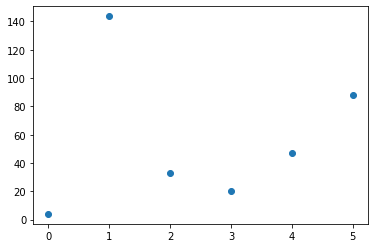

In [196]:
plt.plot(abs(X)**2,'o')

## 왜 $x[n]$이 실수일 경우만 $|X[k]|^2$이 대칭으로 나올까?

`-` 예비학습1

임의의 $0 \leq \alpha \leq 1$에 대하여
$\cos(2\pi \alpha) =\cos(2\pi (1-\alpha))$ 가 성립함

In [265]:
alpha = 0.2
np.cos(2*np.pi*alpha),np.cos(2*np.pi*(1-alpha))

-   그래프를 잘 그려보세여

`-` 예비학습2

임의의 $0 \leq \alpha \leq 1$에 대하여
$\sin(2\pi \alpha) = -\sin(2\pi (1-\alpha))$ 가 성립함

In [266]:
alpha = 0.2
np.sin(2*np.pi*alpha),np.sin(2*np.pi*(1-alpha))

-   그래프를 잘 그려보세여

`-` 왜 실수일경우만 대칭인지? (어디 정리된걸 아무리 찾아도 못찾겠어서
그냥 직접 수식을 썼는데요, 이걸 기억할 필요는 없어요.. 아마 제가
쓴것보다 쉽게 설명하는 방법이 있을겁니다)

(해설) $k=0,1,2,\dots,N-1$에 대하여 $X[k]$는 아래와 같이 표현가능하다.

$$X[k] = \sum_{n=0}^{N-1}x[n]e^{-\frac{j2\pi kn}{N}}$$

오일러공식을 사용하면 아래와 같이 정리할 수 있다.

$$X[k] = \sum_{n=0}^{N-1}x[n]\cos\left(-\frac{2\pi kn}{N}\right) + i \sum_{n=0}^{N-1}x[n]\sin\left(-\frac{2\pi kn}{N}\right)$$

cos은 짝함수, sin은 홀함수임을 이용하여 다시정리하면

$$X[k] = \sum_{n=0}^{N-1}x[n]\cos\left(\frac{2\pi kn}{N}\right) - i \sum_{n=0}^{N-1}x[n]\sin\left(\frac{2\pi kn}{N}\right)$$

**case1** $k=1$ 인 경우와 $k=N-1$인 경우는 서로 $|X[k]|^2$이 같음을
보이자.

$$X[1] = \sum_{n=0}^{N-1}x[n]\cos\left(\frac{2\pi n}{N}\right) - i \sum_{n=0}^{N-1}x[n]\sin\left(\frac{2\pi n}{N}\right)$$

$$X[N-1] = \sum_{n=0}^{N-1}x[n]\cos\left(\frac{2\pi (N-1)n}{N}\right) - i \sum_{n=0}^{N-1}x[n]\sin\left(\frac{2\pi(N-1) n}{N}\right)$$

여기에서 예비학습1,2를 떠올리면
$\cos\left(\frac{2\pi n}{N}\right)=\cos\left(\frac{2\pi (N-1)n}{N}\right)$
이고
$\sin\left(\frac{2\pi n}{N}\right)=-\sin\left(\frac{2\pi(N-1) n}{N}\right)$
임을 알 수 있다. 따라서 $X[1]$와 $X[N-1]$은 켤레복소수이다. 즉

$$X[1] = X[N-1]^\ast, \quad X[1]^\ast = X[N-1]$$

이다. 그런데 임의의 복소수 $x=a+bi$에 대하여
$|x|^2 = a^2+b^2 = (a+bi)(a-bi)= x x^\ast$ 가 성립하므로

$$|X[1]|^2 = |X[N-1]|^2$$

이 성립한다.

> 만약에 $x[n]$이 실수가 아닌경우는
> $\cos\left(\frac{2\pi n}{N}\right)=\cos\left(\frac{2\pi (N-1)n}{N}\right)$
> 이고
> $\sin\left(\frac{2\pi n}{N}\right)=-\sin\left(\frac{2\pi(N-1) n}{N}\right)$
> 이라고 하여도 $X[1]$와 $X[N-1]$은 켤레복소수라고 주장할수 없다.

**case2** $k=2$ 인 경우와 $k=N-2$인 경우는 서로 $|X[k]|^2$이 같음도
비슷한 논리로 보일 수 있다.

# 하나의 주파수를 가진 cos

아래와 같이 하나의 주파수만 있는 $\cos$을 가정하자.

$$x[n] = \cos\left(\frac{2\pi n}{N} \right)$$

In [396]:
N = 15
x = np.array([np.cos(2*np.pi*n/N) for n in range(N)]) 

퓨리에변환은 아래와 같다.

$$X[k] = \sum_{n=0}^{N-1}x[n]\cos\left(\frac{2\pi kn}{N}\right) - i \sum_{n=0}^{N-1}x[n]\sin\left(\frac{2\pi kn}{N}\right)$$

위의 식에서 $x[n]=\cos\left(\frac{2\pi n}{N} \right)$을 대입하면

$$X[k] = \sum_{n=0}^{N-1}\cos\left(\frac{2\pi n}{N} \right)\cos\left(\frac{2\pi kn}{N}\right) - i \sum_{n=0}^{N-1}\cos\left(\frac{2\pi n}{N} \right)\sin\left(\frac{2\pi kn}{N}\right)$$

와 같이 된다. 위의 식은 아래와 같은 특징들이 있다.

## 허수파트 해석

관찰1: 모든 $k$에 대하여 $X[k]$의 허수파트는 항상 0이다.

**k=0**

In [397]:
k=0
sin_part_0 = np.array([np.sin(2*np.pi*k*n/N) for n in range(N)])

In [398]:
x*sin_part_0

In [399]:
sum(x*sin_part_0)

**k=1**

In [400]:
k=1
sin_part_1 = np.array([np.sin(2*np.pi*k*n/N) for n in range(N)])

In [401]:
x*sin_part_1

In [402]:
sum(x*sin_part_1)

약간을 직관을 위해서 그림을 그려보자.

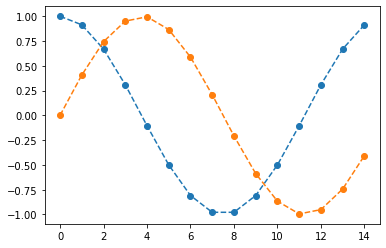

In [403]:
plt.plot(x,'--o')
plt.plot(sin_part_1,'--o')

$x$가 $\mathbb{R}$에서 정의된 연속함수라고 상상하면
$\sum_{n=0}^{N-1}\cos\left(\frac{2\pi n}{N} \right)\sin\left(\frac{2\pi kn}{N}\right)$에
대응하는 식은 $\int_0^{2\pi}\cos(t)\sin(t)dt$라고 볼 수 있어서
`sum(x*sin_part_1)=0`임을 더 쉽게 이해할 수 있다.

**k=2**

In [404]:
k=2
sin_part_2 = np.array([np.sin(2*np.pi*k*n/N) for n in range(N)])

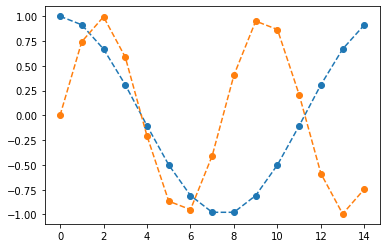

In [405]:
plt.plot(x,'--o')
plt.plot(sin_part_2,'--o')

$x$가 $\mathbb{R}$에서 정의된 연속함수라고 상상하면 파란선에
대응하는것은 $\cos(t)$ 주황선에 대응하는 것은 $\sin(2t)$로 볼 수 있는데
둘은 직교하므로 둘을 곱한뒤 적분하면 (더하면) 0이 된다.

In [406]:
sum(x*sin_part_2)

$\cos(t)$는 임의의 $\sin(kt)$와 항상 직교하므로, 임의의 $k$에 대하여
허수파트는 항상 0이다.

따라서 이 경우 $X[k]$는 아래와 같이 써도 무방하다.

$$X[k] = \sum_{n=0}^{N-1}x[n]\cos\left(\frac{2\pi kn}{N}\right)$$

## 실수파트 해석

관찰2: $X[k]$의 실수파트는 $k=1$혹은 $k=N-1$일때 아래와 같이 정리된다.

$$\sum_{n=0}^{N-1}\cos\left(\frac{2\pi n}{N} \right)^2$$

그외의 경우에는 아래와 같이 된다.

**k=0**

In [407]:
k=0
cos_part_0 = np.array([np.cos(2*np.pi*k*n/N) for n in range(N)])

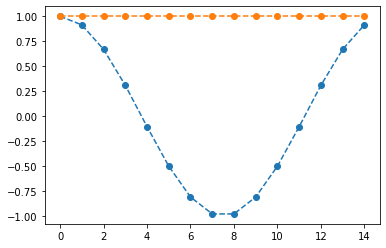

In [408]:
plt.plot(x,'--o')
plt.plot(cos_part_0,'--o')

-   파란선에 대응하는것은 $\cos(t)$ 주황선에 대응하는 것은 $1$로 볼 수
    있는데 둘은 직교하므로 둘을 곱한뒤 적분하면 (더하면) 0이 된다.

**k=2**

In [409]:
k=2
cos_part_2 = np.array([np.cos(2*np.pi*k*n/N) for n in range(N)])

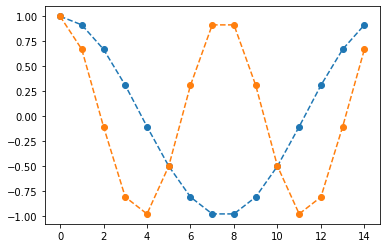

In [410]:
plt.plot(x,'--o')
plt.plot(cos_part_2,'--o')

-   파란선에 대응하는것은 $\cos(t)$ 주황선에 대응하는 것은 $\cos(2t)$로
    볼 수 있는데 둘은 직교하므로 둘을 곱한뒤 적분하면 (더하면) 0이 된다.

임의의 $k$에 대하여 $\cos(t)$와 $\cos(kt)$는 항상 직교하므로 둘을 곱한뒤
적분하면 (더하면) 0이 된다.

`-` 요약: 만약에 $x[n]$이 아래와 같은 꼴이라고 하자.

$$x[n] = \cos\left(\frac{2\pi n}{N} \right)$$

이때 퓨리에변환 $X[k]$는 아래와 같이 정리된다.

$$X[k] = \sum_{n=0}^{N-1}x[n]\cos\left(\frac{2\pi kn}{N}\right) - i \sum_{n=0}^{N-1}x[n]\sin\left(\frac{2\pi kn}{N}\right)$$

$X[k]$의 허수파트는 항상 0이 되고, 실수 파트는 $k=1,N-1$일 경우에만 값을
가지고 나머지는 0의 값을 가진다.

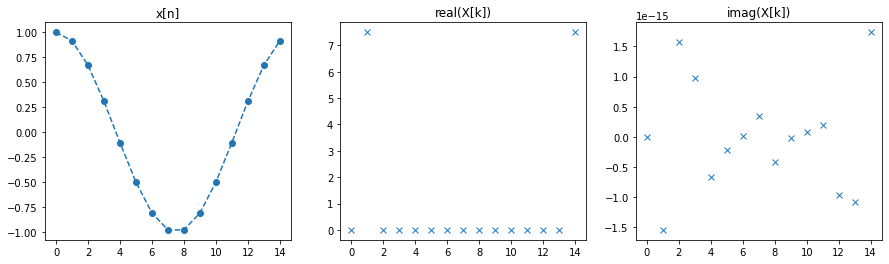

In [ ]:
X = np.fft.fft(x)
fig, ax = plt.subplots(1,3)
ax[0].plot(x,'o--'); ax[0].set_title('x[n]')
ax[1].plot(np.real(X),'x'); ax[1].set_title('real(X[k])')
ax[2].plot(np.imag(X),'x'); ax[2].set_title('imag(X[k])')
fig.set_figwidth(15)

`-` 응용: $x[n]$이 아래와 같은 꼴이라고 하자.

$$x[n] = \cos\left(\frac{6\pi n}{N} \right)$$

퓨리에변환 $X[k]$는 아래와 같이 정리된다.

$$X[k] = \sum_{n=0}^{N-1}x[n]\cos\left(\frac{2\pi kn}{N}\right) - i \sum_{n=0}^{N-1}x[n]\sin\left(\frac{2\pi kn}{N}\right)$$

$X[k]$의 허수파트는 항상 0이 되고, 실수 파트는 $k=3,N-3$일 경우에만 값을
가지고 나머지는 0의 값을 가진다.

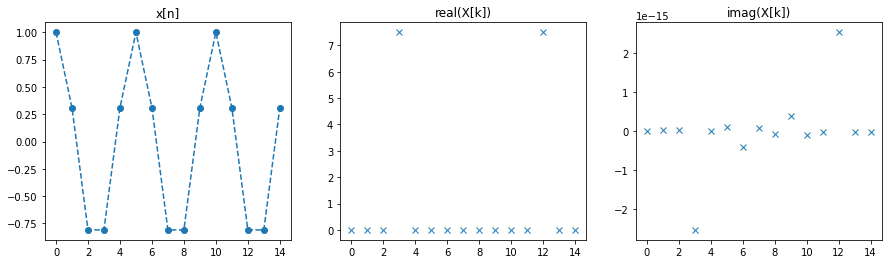

In [414]:
N = 15 
x = np.array([np.cos(6*np.pi*n/N) for n in range(N)]) 
X = np.fft.fft(x)
fig, ax = plt.subplots(1,3)
ax[0].plot(x,'o--'); ax[0].set_title('x[n]')
ax[1].plot(np.real(X),'x'); ax[1].set_title('real(X[k])')
ax[2].plot(np.imag(X),'x'); ax[2].set_title('imag(X[k])')
fig.set_figwidth(15)

# 여러 주파수를 가진 cos

`-` 예시: $x[n]$이 아래와 같은 꼴이라고 하자.

$$x[n] = \cos\left(\frac{2\pi n}{N} \right)+2\times\cos\left(\frac{6\pi n}{N} \right)$$

퓨리에변환 $X[k]$는 아래와 같이 정리된다.

$$X[k] = \sum_{n=0}^{N-1}x[n]\cos\left(\frac{2\pi kn}{N}\right) - i \sum_{n=0}^{N-1}x[n]\sin\left(\frac{2\pi kn}{N}\right)$$

$X[k]$의 허수파트는 항상 0이 되고, 실수 파트는 $k=1,3,N-3,N-1$일
경우에만 값을 가지고 나머지는 0의 값을 가진다.

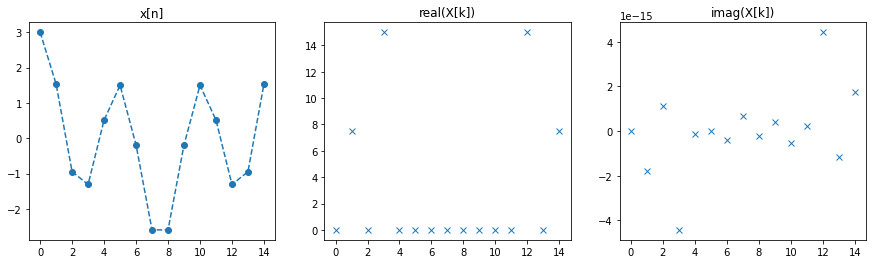

In [466]:
N = 15 
x = np.array([np.cos(2*np.pi*n/N)+2*np.cos(6*np.pi*n/N) for n in range(N)]) 
X = np.fft.fft(x)
fig, ax = plt.subplots(1,3)
ax[0].plot(x,'o--'); ax[0].set_title('x[n]')
ax[1].plot(np.real(X),'x'); ax[1].set_title('real(X[k])')
ax[2].plot(np.imag(X),'x'); ax[2].set_title('imag(X[k])')
fig.set_figwidth(15)

이것은 $x[n]$을 아래와 같이 나눈뒤

-   $x_1[n] = \cos\left(\frac{2\pi n}{N} \right)$
-   $x_2[n] = 2\times\cos\left(\frac{6\pi n}{N} \right)$

각각 퓨리에변환한 결과를 합친것과 같다.

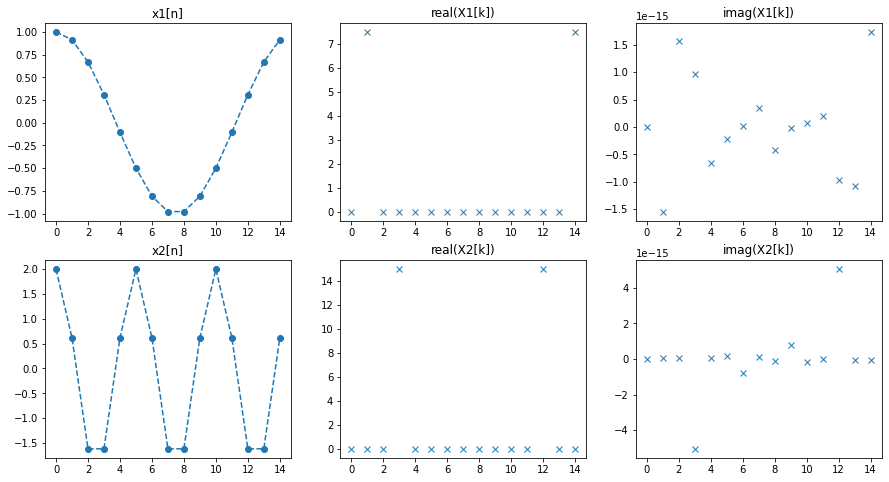

In [473]:
N = 15 
x1 = np.array([np.cos(2*np.pi*n/N) for n in range(N)]) 
x2 = np.array([2*np.cos(6*np.pi*n/N) for n in range(N)]) 
X1 = np.fft.fft(x1)
X2 = np.fft.fft(x2)
fig, ax = plt.subplots(2,3)
ax[0][0].plot(x1,'o--'); ax[0][0].set_title('x1[n]')
ax[0][1].plot(np.real(X1),'x'); ax[0][1].set_title('real(X1[k])')
ax[0][2].plot(np.imag(X1),'x'); ax[0][2].set_title('imag(X1[k])')
ax[1][0].plot(x2,'o--'); ax[1][0].set_title('x2[n]')
ax[1][1].plot(np.real(X2),'x'); ax[1][1].set_title('real(X2[k])')
ax[1][2].plot(np.imag(X2),'x'); ax[1][2].set_title('imag(X2[k])')
fig.set_figwidth(15)
fig.set_figheight(8)

# 여러 주파수를 가진 sin

`-` 예시: $x[n]$이 아래와 같은 꼴이라고 하자.

$$x[n] = \sin\left(\frac{2\pi n}{N} \right)+2\times\sin\left(\frac{6\pi n}{N} \right)$$

퓨리에변환 $X[k]$는 아래와 같이 정리된다.

$$X[k] = \sum_{n=0}^{N-1}x[n]\cos\left(\frac{2\pi kn}{N}\right) - i \sum_{n=0}^{N-1}x[n]\sin\left(\frac{2\pi kn}{N}\right)$$

앞의 논의와 유사하게 전개하면 $X[k]$의 실수파트는 항상 0이 되고,
허수파트는 $k=1,3,N-3,N-1$일 경우에만 값을 가지고 나머지는 0의 값을
가진다.

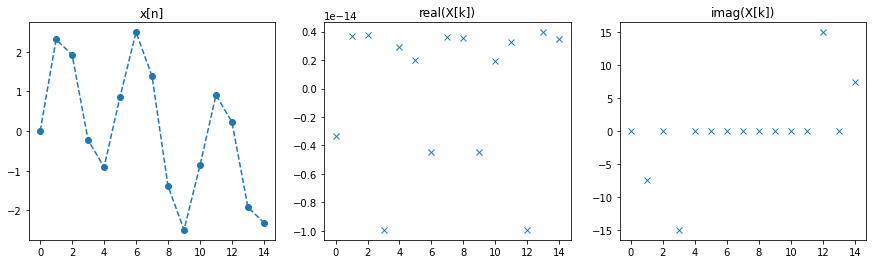

In [474]:
N = 15 
x = np.array([np.sin(2*np.pi*n/N)+2*np.sin(6*np.pi*n/N) for n in range(N)]) 
X = np.fft.fft(x)
fig, ax = plt.subplots(1,3)
ax[0].plot(x,'o--'); ax[0].set_title('x[n]')
ax[1].plot(np.real(X),'x'); ax[1].set_title('real(X[k])')
ax[2].plot(np.imag(X),'x'); ax[2].set_title('imag(X[k])')
fig.set_figwidth(15)

# 요약

`-` $x[n]$이 여러주파수를 가진 cos이라면 $X[k]$는 아래와 같은 성질을
가지고

-   허수파트: 항상 0
-   실수파트: 해당 주파수에서만 값을 가짐

$|X[k]|$는 $k=0$을 제외하고 항상 대칭임

`-` $x[n]$이 여러주파수를 가진 sin이라면 $X[k]$는 아래와 같은 성질을
가지고

-   실수파트: 항상 0
-   허수파트: 해당 주파수에서만 값을 가짐

$|X[k]|$는 $k=0$을 제외하고 항상 대칭임

# 스펙트럼의 해석

`-` 예비학습: 만약에 $x[n]$이 아래와 같은 꼴이라고 하자.

-   $x[n] = \cos\left(\frac{2\pi n}{N}\right)$

그러면 $\sum_{n=0}^{N-1}x^2[n]=\frac{N}{2}$ 이 성립한다.

(증명?)

아래를 관찰하라.

-   $x[n] = \frac{1}{2}\left(e^{i \frac{2\pi n}{N}}+e^{-i \frac{2\pi n}{N}}\right)$
-   $x^2[n] = \frac{1}{4}\left(e^{i \frac{4\pi n}{N}}+e^{-i \frac{4\pi n}{N}}+2\right)=\frac{1}{2} + \frac{1}{2}\cos\left(\frac{4\pi n}{N}\right)$

이중에서 $\sum_{n=0}^{N-1}\cos\left(\frac{4\pi n}{N} \right)$ 은
0이되므로 $\sum_{n=0}^{N-1}x^2[n]=\frac{N}{2}$이다.

7.500000000000002 7.5

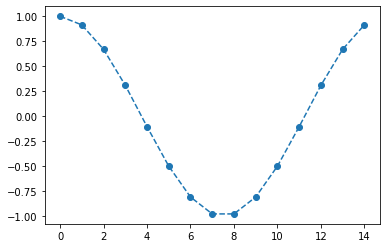

In [562]:
N = 15
x = np.array([np.cos(2*np.pi*n/N) for n in range(N)])
plt.plot(x,'--o')
print((x**2).sum(), N/2)

In [545]:
x,y

`-` 스펙트럼의 해석: 만약에 $x[n]$이 아래와 같은 꼴이라고 하자.

$$x[n] = \beta_1\cos\left(\frac{2\pi n}{N} \right)$$

Parseval thm에 의하여

$$\sum_{n=0}^{N-1}|x[n]|^2=\frac{1}{N}\sum_{k=0}^{N-1}|X[k]|^2$$

가 성립한다. 좌변과 우변을 각각 정리하면

-   $LHS = \frac{N}{2}\beta_1^2$ ($\because$ 예비학습에 의하여)
-   $RHS = \frac{2}{N}|X[1]|^2$ ($\because$ $X[k]$는 $k=1,N-1$일 때에만
    0이 아닌 값을 가지고 $X[1]=X[N-1]$ 이므로)

이다. 따라서

$$\frac{N}{2}\beta_1^2 = \frac{2}{N}|X[1]|^2$$

이 성립한다. 따라서

-   $\beta_1^2 = \frac{4}{N^2}|X[1]|^2$
-   $\beta_1 = \frac{2}{N}|X[1]|^2$

이 성립한다.

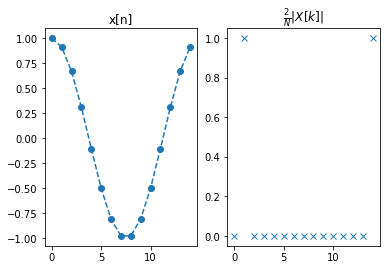

In [590]:
N = 15
x = np.array([np.cos(2*np.pi*n/N) for n in range(N)])
X = np.fft.fft(x)
fig, ax = plt.subplots(1,2)
ax[0].plot(x,'o--'); ax[0].set_title('x[n]')
ax[1].plot(abs(X)*2/N,'x'); ax[1].set_title(r'$\frac{2}{N}|X[k]|$')

`-` 예제2: 만약에 $x[n]$이 아래와 같은 꼴이라고 하자.

$$x[n] = \beta_1 \cos\left(1\times \frac{2\pi n}{N} \right) + \beta_2\cos\left(2\times \frac{2\pi n}{N} \right) +\beta_7 \cos\left(7\times \frac{2\pi n}{N} \right)$$

In [581]:
beta1 = 3 
beta2 = 0.5
beta7 = -2 

In [592]:
N = 15 
n = np.arange(15) 
x = beta1 * np.cos(1 * 2*np.pi*n/N) +\
beta2 * np.cos(2 * 2*np.pi*n/N) +\
beta7 * np.cos(7 * 2*np.pi*n/N)
X = np.fft.fft(x) 

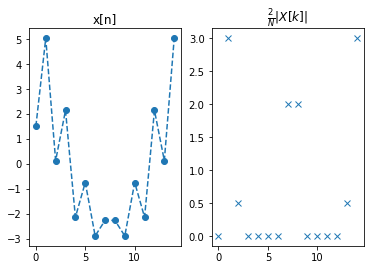

In [593]:
N = 15
fig, ax = plt.subplots(1,2)
ax[0].plot(x,'o--'); ax[0].set_title('x[n]')
ax[1].plot(abs(X)*2/N,'x'); ax[1].set_title(r'$\frac{2}{N}|X[k]|$')

# Appendix: 주파수누수

`-` 지금까지는

$$\exists k\in \mathbb{N}_0~ {\sf s.t.}\quad x[n]= \cos\left(\frac{2\pi kn}{N}\right)$$

이 성립하는 경우를 살펴보았다. 이제 그렇지 않은 경우를 살펴보자.

`-` $x[n]$이 아래와 같은 꼴이라고 하자.

$$x[n] = \cos\left(\frac{2.1\pi n}{N} \right)$$

이는 $x[n] = \cos\left(\frac{2\pi n}{N} \right)$ 와 거의 비슷하지만
미묘하게 다르다. 퓨리에변환 $X[k]$는 아래와 같이 정리된다.

$$X[k] = \sum_{n=0}^{N-1}x[n]\cos\left(\frac{2\pi kn}{N}\right) - i \sum_{n=0}^{N-1}x[n]\sin\left(\frac{2\pi kn}{N}\right)$$

이 경우 $x[n]=\cos\left(\frac{2\pi n}{N} \right)$인 경우와는 다르게

$$\not \exists k\in \mathbb{N}_0~ {\sf s.t.}\quad x[n]= \cos\left(\frac{2\pi kn}{N}\right)$$

이다. 따라서

-   허수파트가 0이라든가,
-   실수파트는 $k=1, N-1$에서만 값을 가진다든가

와 같은 논의가 성립하지는 않는다. 하지만 **대충** 성립한다. 그림으로
비교해보면 아래와 같다.

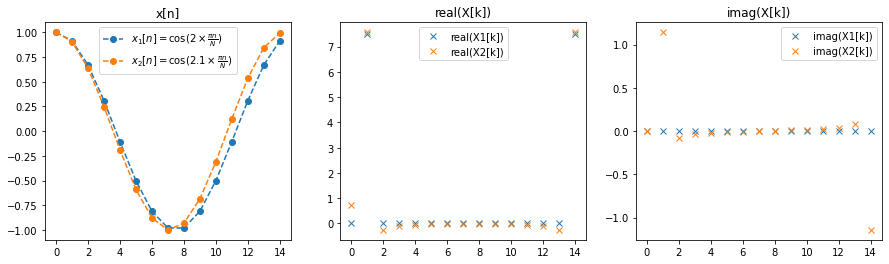

In [608]:
N = 15 
x1 = np.array([np.cos(2.0*np.pi*n/N) for n in range(N)]) 
x2 = np.array([np.cos(2.1*np.pi*n/N) for n in range(N)]) 
X1 = np.fft.fft(x1)
X2 = np.fft.fft(x2)
fig, ax = plt.subplots(1,3)
###
ax[0].set_title('x[n]')
ax[0].plot(x1,'o--',label=r'$x_1[n]=\cos(2\times\frac{\pi n}{N})$')
ax[0].plot(x2,'o--',label=r'$x_2[n]=\cos(2.1\times\frac{\pi n}{N})$')
ax[0].legend()
###
ax[1].set_title('real(X[k])')
ax[1].plot(np.real(X1),'x',label='real(X1[k])'); 
ax[1].plot(np.real(X2),'x',label='real(X2[k])'); 
ax[1].legend()
###
ax[2].set_title('imag(X[k])')
ax[2].plot(np.imag(X1),'x',label='imag(X1[k])')
ax[2].plot(np.imag(X2),'x',label='imag(X2[k])')
ax[2].legend()
fig.set_figwidth(15)


$x[n] = \cos\left(\frac{2.1\pi n}{N} \right)$의 경우의 $X[k]$의 값은
$x[n] = \cos\left(\frac{2.0\pi n}{N} \right)$일 때와는 다르게

-   $k=1,N-1$이외의 구간에도 약간씩 값이 있으며
-   위상이 뒤틀림에 따라서 허수파트에 대한 값이 생김

그렇지만 거의비슷함.

`-` 요약: 아래의 상황이 발생해도

$$\not \exists k\in \mathbb{N}_0~ {\sf s.t.}\quad x[n]= \cos\left(\frac{2\pi kn}{N}\right)$$

대충 주파수가 나뉘어져 합리적으로 해석됨